# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Importing the dataset

In [2]:
df=pd.read_csv("train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head() #to read the first five rows in the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Exploration and Data Cleaning

In [4]:
df.info() #it tells us details of the columns present along with their datatypes and count(number of non-null values present).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [5]:
df.describe() # it gives us the statistical descrption of numerical data 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.shape #gives number of rows and columns present

(614, 13)

In [7]:
df.size  #gives number of values present

7982

In [8]:
df.columns #gives the columns present

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df.dtypes #gives datatype of each column

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df['Loan_Status'].value_counts() #it counts the number of person who got the loan or not 

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [13]:
df.isnull().sum() #provides how many null values present in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Dealing with the missing values

In [14]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Self_Employed'].fillna('No',inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [17]:
#for converting datatype using astype
df['Credit_History']=df['Credit_History'].astype(int)
df['Credit_History']

0      1
1      1
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Credit_History, Length: 614, dtype: int32

# Label Encoding 

In [18]:
#for converting categorical features to numeric using labelencoder
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


In [19]:
df.groupby('Loan_Status')['LoanAmount'].mean()

Loan_Status
0    150.945488
1    144.349606
Name: LoanAmount, dtype: float64

In [20]:
df.groupby('Loan_Status')['Credit_History'].mean()

Loan_Status
0    0.572917
1    0.983412
Name: Credit_History, dtype: float64

In [21]:
df.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
0    5446.078125
1    5384.068720
Name: ApplicantIncome, dtype: float64

In [22]:
df.groupby('Loan_Status')['CoapplicantIncome'].mean()

Loan_Status
0    1877.807292
1    1504.516398
Name: CoapplicantIncome, dtype: float64

# Exploratory Data Analysis

<AxesSubplot:ylabel='Loan_Status'>

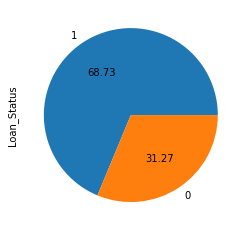

In [23]:
df.Loan_Status.value_counts(normalize=True).plot(kind='pie',autopct="%.2f")#normalize(If True then the object returned will contain the relative
   # frequencies of the unique values.)

<AxesSubplot:>

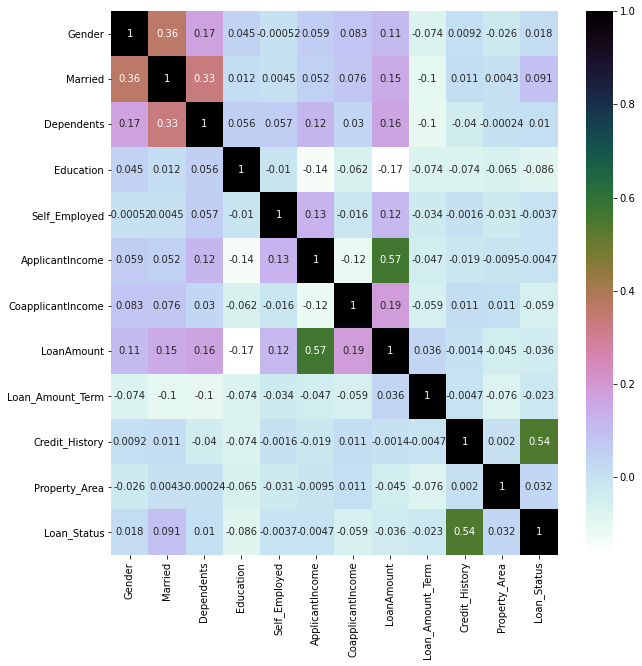

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')

In [25]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1,2,1


Univariate Analysis

c:\users\achu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\achu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\achu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

<AxesSubplot:xlabel='Dependents', ylabel='count'>

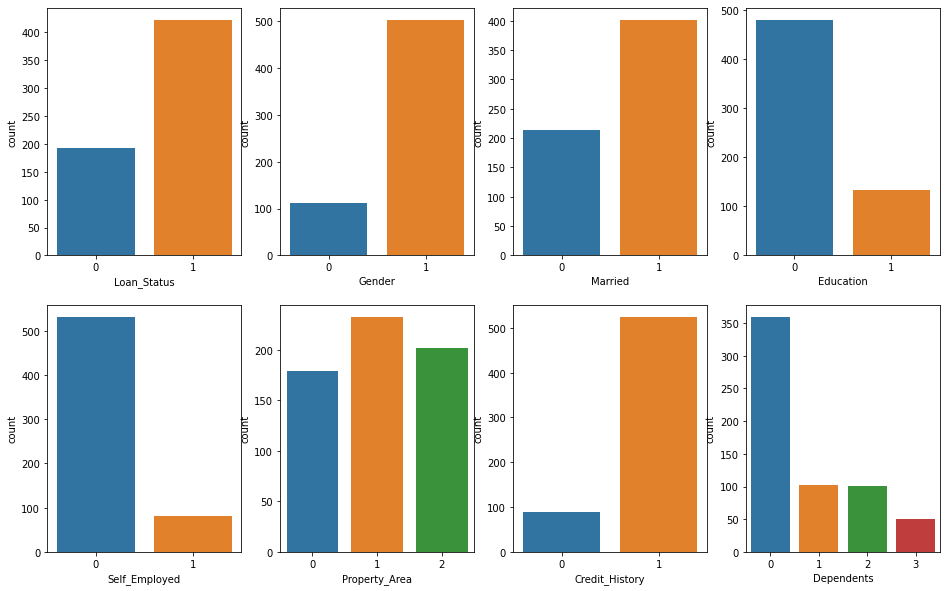

In [26]:
fig,ax=plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status',data=df,ax=ax[0][0])
sns.countplot('Gender',data=df,ax=ax[0][1])
sns.countplot('Married',data=df,ax=ax[0][2])
sns.countplot('Education',data=df,ax=ax[0][3])
sns.countplot('Self_Employed',data=df,ax=ax[1][0])
sns.countplot('Property_Area',data=df,ax=ax[1][1])
sns.countplot('Credit_History',data=df,ax=ax[1][2])
sns.countplot('Dependents',data=df,ax=ax[1][3])

In [27]:
# Normalize can be set to True to print proportions instead of number
df['Loan_Status'].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

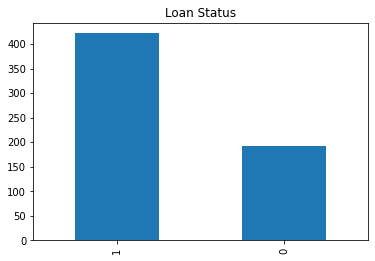

In [28]:
df['Loan_Status'].value_counts().plot.bar()
plt.title("Loan Status")
plt.show()

#422(around 69%) people out of 614 got the approval.

c:\users\achu\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\users\achu\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\users\achu\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


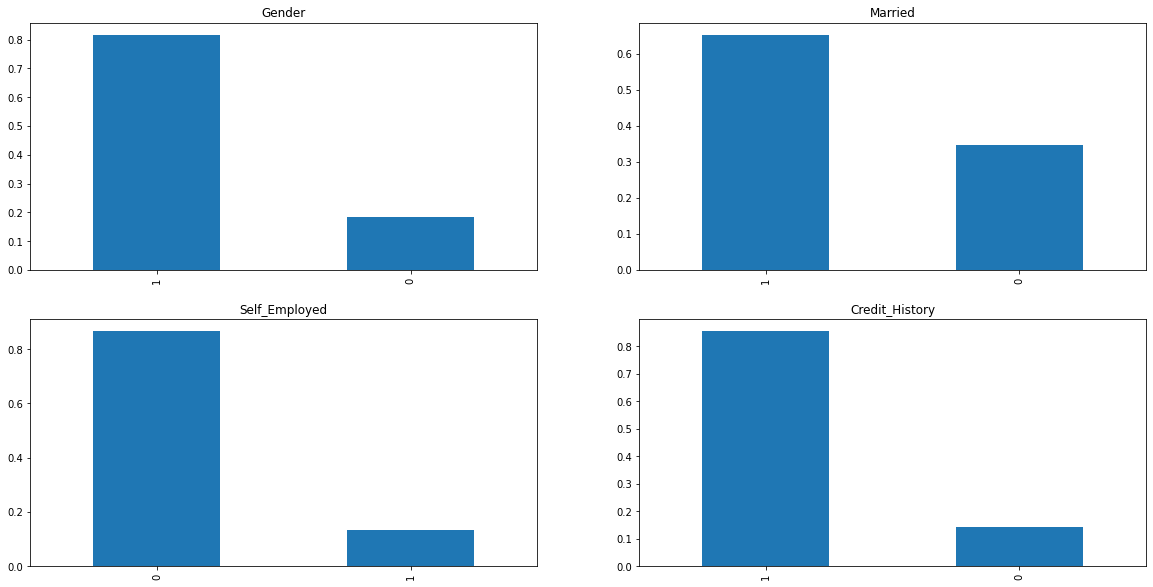

In [29]:
#It can be inferred from the above bar plots that:
#80% of applicants in the dataset are male.
#Around 65% of the applicants in the dataset are married.
#About 15% of applicants in the dataset are self-employed.
#About 85% of applicants have repaid their debts.
#Independent Variable (Categorical)
plt.figure(1) 
plt.subplot(221) 
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

c:\users\achu\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\users\achu\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


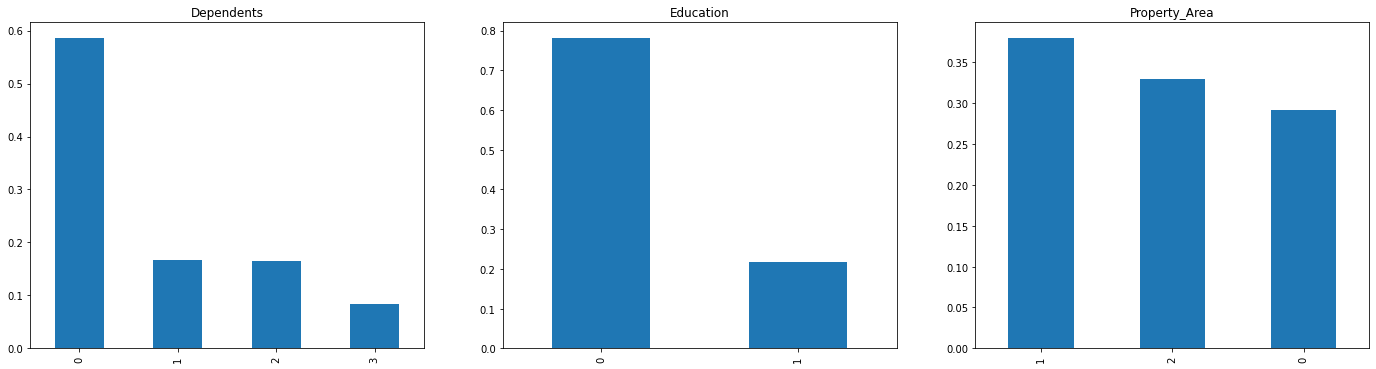

In [30]:
#Independent Variable (Ordinal)
plt.figure(1) 
plt.subplot(131)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(132)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Bivariate Analysis

In [31]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status']) 
Gender

Loan_Status,0,1
Gender,,
0,37,75
1,155,347


<AxesSubplot:xlabel='Gender'>

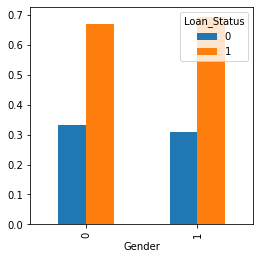

In [32]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

In [33]:
Married=pd.crosstab(df['Married'],df['Loan_Status']) 
Married 

Loan_Status,0,1
Married,,
0,79,134
1,113,288


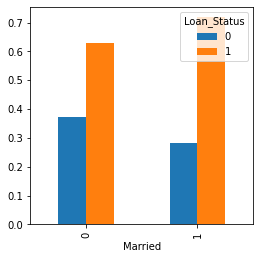

In [34]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show()

In [35]:
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents

Loan_Status,0,1
Dependents,,
0,113,247
1,36,66
2,25,76
3,18,33


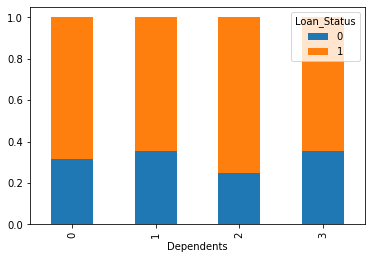

In [36]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

In [37]:
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education

Loan_Status,0,1
Education,,
0,140,340
1,52,82


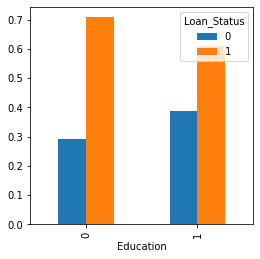

In [38]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show()

In [39]:
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed

Loan_Status,0,1
Self_Employed,,
0,166,366
1,26,56


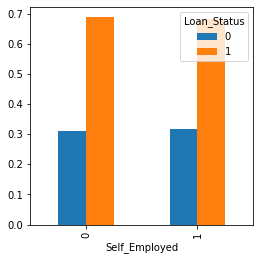

In [40]:
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.show()

In [41]:
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status']) 
Credit_History


Loan_Status,0,1
Credit_History,,
0,82,7
1,110,415


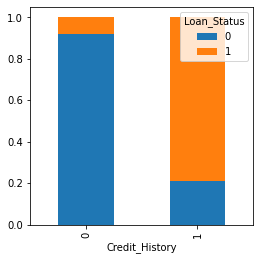

In [42]:
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

In [43]:
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area

Loan_Status,0,1
Property_Area,,
0,69,110
1,54,179
2,69,133


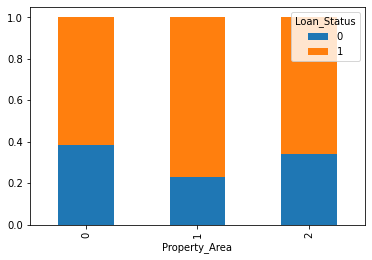

In [44]:
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

<AxesSubplot:>

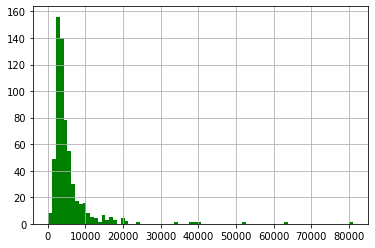

In [45]:
df['ApplicantIncome'].hist(bins=80,grid=True,color='green')

<AxesSubplot:>

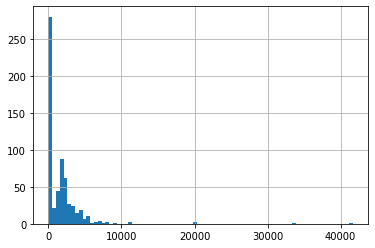

In [46]:
df['CoapplicantIncome'].hist(bins=80,grid=True)

<AxesSubplot:>

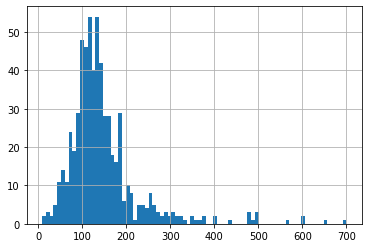

In [47]:
df['LoanAmount'].hist(bins=80,grid=True)

<AxesSubplot:>

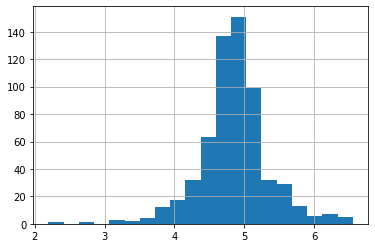

In [48]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [49]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1,4.986426
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,4.852030
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,4.189655
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,4.787492
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1,4.262680
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1,0,1,3.688879
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1,5.533389
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1,2,1,5.231109


<AxesSubplot:>

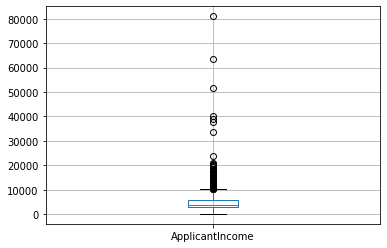

In [50]:
df.boxplot(column='ApplicantIncome')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

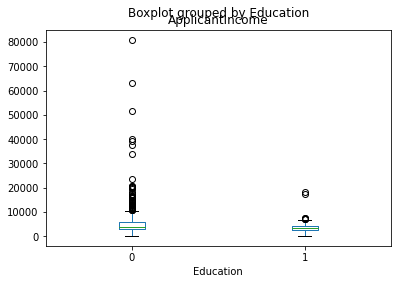

In [51]:
df.boxplot(column = 'ApplicantIncome', grid =False, by = 'Education')

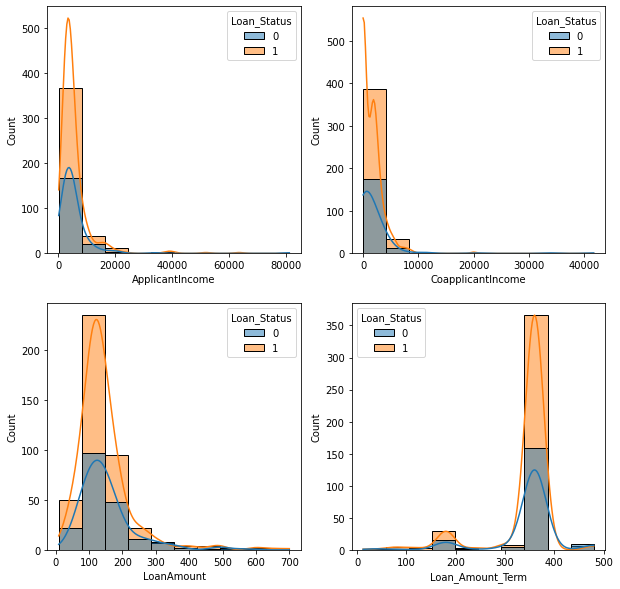

In [52]:
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
fig,ax = plt.subplots(2,2,figsize=(10,10))
ax=ax.flatten()
for i,col in enumerate(num_cols):
    sns.histplot(x=col,data=df,hue='Loan_Status',bins=10,ax=ax[i],kde=True)

c:\users\achu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\achu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\achu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\achu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

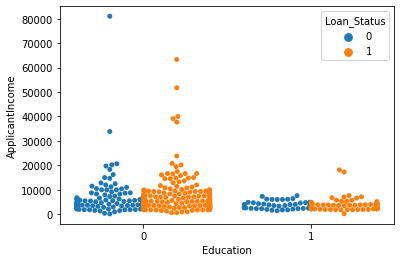

In [53]:
sns.swarmplot(y='ApplicantIncome',x='Education',hue='Loan_Status',data=df,dodge=True)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Model Creation

In [55]:
x = df[['Credit_History','Gender','Married','Education','Self_Employed']]
y = df['Loan_Status']

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [69]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [70]:
x_train

array([[ 0.40323892,  0.49343516, -1.3779146 ,  1.90076385, -0.40713741],
       [ 0.40323892,  0.49343516,  0.72573438, -0.52610428, -0.40713741],
       [ 0.40323892,  0.49343516, -1.3779146 , -0.52610428, -0.40713741],
       ...,
       [-2.47991935,  0.49343516,  0.72573438,  1.90076385, -0.40713741],
       [ 0.40323892,  0.49343516,  0.72573438, -0.52610428, -0.40713741],
       [ 0.40323892, -2.02660871, -1.3779146 , -0.52610428, -0.40713741]])

# Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [72]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1])

In [73]:
from sklearn import metrics
print("the accuracy score of decision tree is",metrics.accuracy_score(y_pred,y_test))

the accuracy score of decision tree is 0.8216216216216217


In [74]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [75]:
cm

array([[ 25,  26],
       [  7, 127]], dtype=int64)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.49      0.60        51
           1       0.83      0.95      0.89       134

    accuracy                           0.82       185
   macro avg       0.81      0.72      0.74       185
weighted avg       0.82      0.82      0.81       185

[[ 25  26]
 [  7 127]]
0.8850174216027874


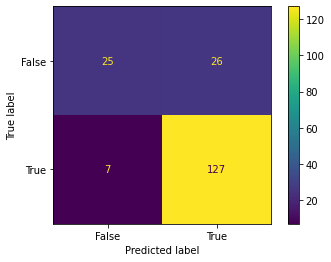

In [81]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False,True])
cm_display.plot()
plt.show()

# Logistic Regression


In [78]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1,solver='liblinear')
logit.fit(x_train,y_train)
y_pred1 =logit.predict(x_test)
print(classification_report(y_test,y_pred))
print("the accuracy score of Logistic Regression is",metrics.accuracy_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.49      0.60        51
           1       0.83      0.95      0.89       134

    accuracy                           0.82       185
   macro avg       0.81      0.72      0.74       185
weighted avg       0.82      0.82      0.81       185

the accuracy score of Logistic Regression is 0.8378378378378378
0.896551724137931


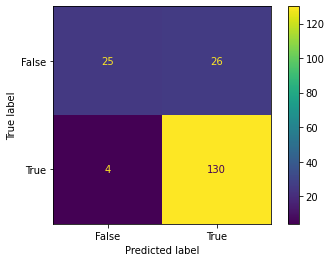

In [82]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False,True])
cm_display.plot()
plt.show()